# Laboratorio 12
## Esercizi 12.2 & 12.3
Sviluppo una rete convoluzionale per il problema di classificazione delle cifre del dataset MNIST.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 3


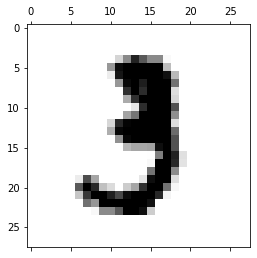

an example of a data point with label 3 before to_categorical ...
... and with label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
#X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[10])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[10].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[10], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[10], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Creo una rete convoluzionale caratterizzata da due strati convoluzionali, da $n_{filter}=10$ e $n_{filter} = 20$ filtri, rispettivamente; dopo ogni strato convoluzionale eseguo un maxpooling con dimensione $2\times2$; concludo con un flatten hidden layer seguito da un dropout (con rate 0.5); al termine di questi passaggi ripropongo uno strato denso, con un numero di neuroni pari al numero di classi del problema. Ho utilizzato come ottimizzatore *SGD*, come funzioni di attivazione intermedie *relu* e come funzione di attivazione finale *softmax*.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_CNN():
    n_neurons_connected = 50
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(n_neurons_connected, activation='relu'))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))    
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

Procedo trainando la rete con $n_{epochs}=10$:

In [11]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9392 - accuracy: 0.6858 - val_loss: 0.2222 - val_accuracy: 0.9382
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3683 - accuracy: 0.8862 - val_loss: 0.1372 - val_accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2686 - accuracy: 0.9178 - val_loss: 0.1116 - val_accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2287 - accuracy: 0.9298 - val_loss: 0.0835 - val_accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2020 - accuracy: 0.9381 - val_loss: 0.0760 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1832 - accuracy: 0.9448 - val_loss: 0.0698 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1702 - accuracy: 0.9483 - val_loss: 0.0658 -

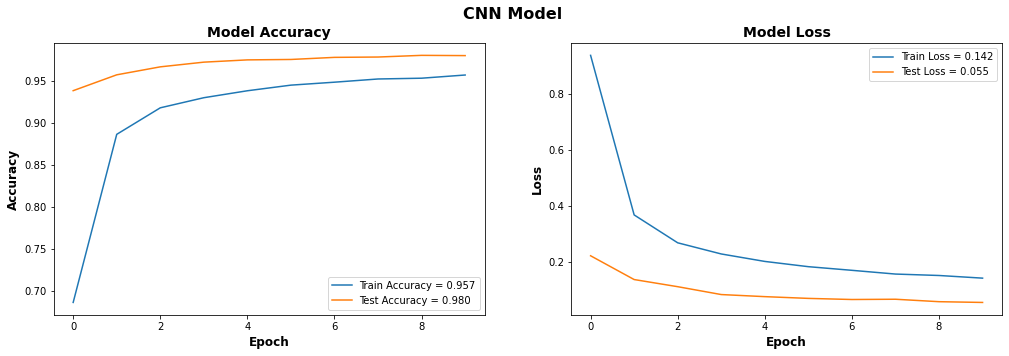

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(17, 5))
fig.suptitle("CNN Model", fontsize=16, fontweight = "bold")

# summarize history for accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy', fontsize = 14, fontweight = 'bold')
ax[0].set_ylabel('Accuracy', fontsize = 12, fontweight = 'bold')
ax[0].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[0].legend(['Train Accuracy = 0.957', 'Test Accuracy = 0.980'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss', fontsize = 14, fontweight = 'bold')
ax[1].set_ylabel('Loss', fontsize = 12, fontweight = 'bold')
ax[1].set_xlabel('Epoch', fontsize = 12, fontweight = 'bold')
ax[1].legend(['Train Loss = 0.142', 'Test Loss = 0.055'], loc='best')

plt.show()

I risultati sembrano molto buoni: sembra che un eventuale aumento di epoche non possa produrre un ulteriore miglioramento. Procedo con la creazione di una matrice di confusione, che in problemi di classificazione è molto utile per dare una visione dettagliata del funzionamento della rete.

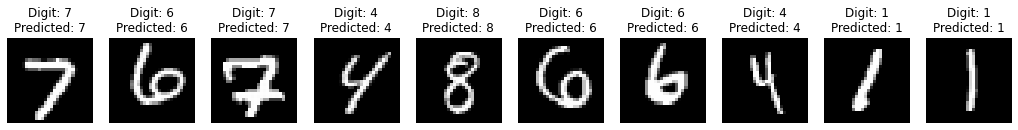

In [13]:
import random
from random import sample
predictions = model_CNN.predict(X_test)
predictions_train = model_CNN.predict(X_train)
predictions = np.argmax(predictions, axis=1)
predictions_train = np.argmax(predictions_train, axis=1)

plt.figure(figsize=(18, 8)) 

rnd = random.sample(range(len(X_test)),10)
for j in range(10):    
    ax = plt.subplot(2, 10, j + 1)    
    plt.imshow(X_test[rnd[j], :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[rnd[j]]), predictions[rnd[j]]))    
    plt.axis('off') 
plt.show()

In [15]:
import sklearn.metrics as metrics 
Y_train_cm = np.argmax(Y_train, axis=1)
Y_test_cm = np.argmax(Y_test, axis=1)

confusion_matrix_train = metrics.confusion_matrix(y_true=Y_train_cm, y_pred=predictions_train)
confusion_matrix_test = metrics.confusion_matrix(y_true=Y_test_cm, y_pred=predictions)

Ci sono 200 immagini predette in modo errato.


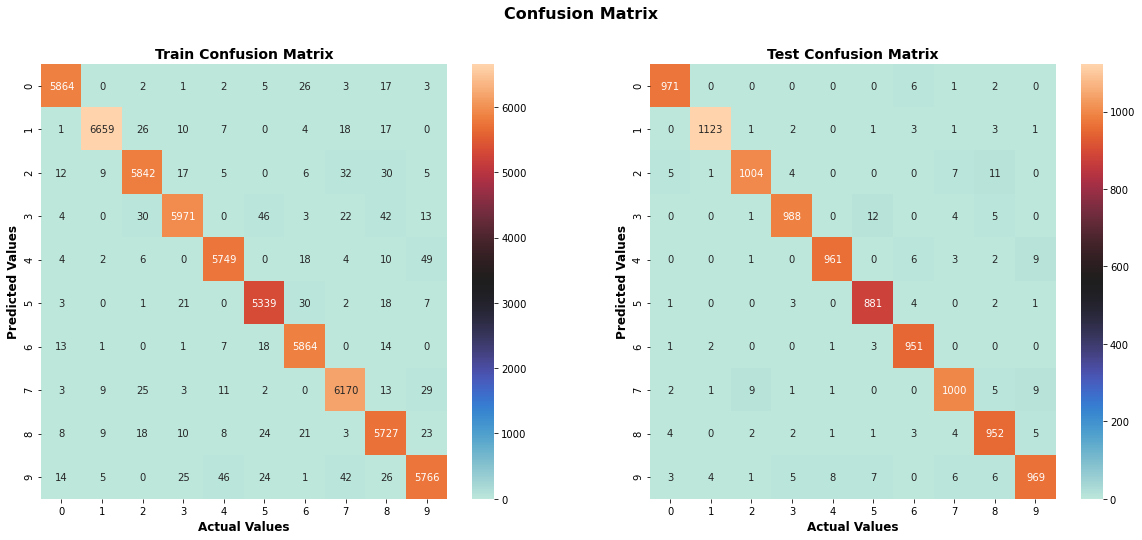

In [24]:
import seaborn as sns

pred = model_CNN.predict_classes(X_test)
inc = np.nonzero(pred != Y_test.argmax(1))
print('Ci sono',len(inc[0]),'immagini predette in modo errato.')

fig, ax = plt.subplots(1,2,figsize = (20, 8))
sns.heatmap(confusion_matrix_train, annot=True, ax = ax[0], cmap="icefire", fmt='d')
ax[0].set_title("Train Confusion Matrix", fontsize = 14, fontweight = 'bold')
ax[0].set_xlabel("Actual Values", fontsize = 12, fontweight = 'bold')
ax[0].set_ylabel("Predicted Values", fontsize = 12, fontweight = 'bold')


sns.heatmap(confusion_matrix_test, annot=True, ax = ax[1], cmap="icefire", fmt='d')
ax[1].set_title("Test Confusion Matrix", fontsize = 14, fontweight = 'bold')
ax[1].set_xlabel("Actual Values", fontsize = 12, fontweight = 'bold')
ax[1].set_ylabel("Predicted Values", fontsize = 12, fontweight = 'bold')

fig.suptitle('Confusion Matrix', fontsize = 16, fontweight = 'bold')
plt.show()

È chiaro come la reti funzioni molto bene su determinate cifre, mentre altre vengono più facilmente confuse. 

Infine, dopo aver importato le cifre da me scritte, applico la rete neurale convoluzionale:

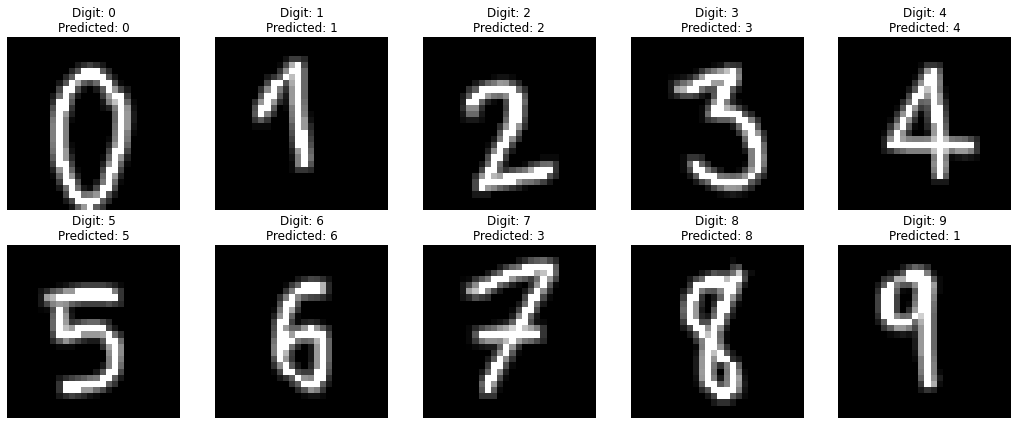

In [22]:
from PIL import Image
import os

plt.figure(figsize=(18, 7)) 

for i in range(10):
    digit_filename = "./Digits/"+str(i)+".png"
    digit_in = Image.open(digit_filename).convert("L")
    ydim, xdim = digit_in.size
    
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    data /= 255
    data = data.reshape(1,xdim,ydim,1)
    prediction = model_CNN.predict(data)

    ax = plt.subplot(2, 5, i + 1)
    plt.title("Digit: {}\nPredicted: {}".format(i,np.argmax(prediction)))    
    plt.imshow(data[0,:,:,0], cmap='gray')
    plt.axis('off')
    
plt.show()


I risultati delle previsioni sono pressoché corretti: si vede una confusione sul numero 7 e sul numero 9.